In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv("algerian.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [72]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   day          246 non-null    str  
 1   month        245 non-null    str  
 2   year         245 non-null    str  
 3   Temperature  245 non-null    str  
 4    RH          245 non-null    str  
 5    Ws          245 non-null    str  
 6   Rain         245 non-null    str  
 7   FFMC         245 non-null    str  
 8   DMC          245 non-null    str  
 9   DC           245 non-null    str  
 10  ISI          245 non-null    str  
 11  BUI          245 non-null    str  
 12  FWI          245 non-null    str  
 13  Classes      244 non-null    str  
dtypes: str(14)
memory usage: 27.1 KB


In [73]:
df[df.isnull().any(axis =1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [74]:
df.loc[:122,"Region"]= 0
df.loc[126:,"Region"] = 1

In [75]:
df.shape

(247, 15)

In [76]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    str    
 1   month        245 non-null    str    
 2   year         245 non-null    str    
 3   Temperature  245 non-null    str    
 4    RH          245 non-null    str    
 5    Ws          245 non-null    str    
 6   Rain         245 non-null    str    
 7   FFMC         245 non-null    str    
 8   DMC          245 non-null    str    
 9   DC           245 non-null    str    
 10  ISI          245 non-null    str    
 11  BUI          245 non-null    str    
 12  FWI          245 non-null    str    
 13  Classes      244 non-null    str    
 14  Region       244 non-null    float64
dtypes: float64(1), str(14)
memory usage: 29.1 KB


In [77]:
df['Region'] = df['Region'].astype(str)

In [78]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   day          246 non-null    str  
 1   month        245 non-null    str  
 2   year         245 non-null    str  
 3   Temperature  245 non-null    str  
 4    RH          245 non-null    str  
 5    Ws          245 non-null    str  
 6   Rain         245 non-null    str  
 7   FFMC         245 non-null    str  
 8   DMC          245 non-null    str  
 9   DC           245 non-null    str  
 10  ISI          245 non-null    str  
 11  BUI          245 non-null    str  
 12  FWI          245 non-null    str  
 13  Classes      244 non-null    str  
 14  Region       244 non-null    str  
dtypes: str(15)
memory usage: 29.1 KB


In [79]:
df.shape

(247, 15)

In [80]:
df[df.isnull().any(axis =1)]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,NaN
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [81]:
df.shape

(247, 15)

In [82]:
df['Region'].value_counts()


Region
0.0    123
1.0    121
Name: count, dtype: int64

In [84]:
df = df.dropna().reset_index()
df.isnull().sum()

index          0
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [85]:
df['Region'].value_counts()


Region
0.0    122
1.0    120
Name: count, dtype: int64

In [86]:
df.shape

(242, 16)

In [87]:
df.iloc[[122]]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0


In [88]:
df = df.drop(122).reset_index(drop = True)

In [94]:
df.iloc[[123]]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,128,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1.0


In [95]:
df.shape

(241, 16)

In [96]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='str')

In [97]:
df.columns = df.columns.str.strip()
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='str')

In [98]:

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   index        241 non-null    int64
 1   day          241 non-null    str  
 2   month        241 non-null    str  
 3   year         241 non-null    str  
 4   Temperature  241 non-null    str  
 5   RH           241 non-null    str  
 6   Ws           241 non-null    str  
 7   Rain         241 non-null    str  
 8   FFMC         241 non-null    str  
 9   DMC          241 non-null    str  
 10  DC           241 non-null    str  
 11  ISI          241 non-null    str  
 12  BUI          241 non-null    str  
 13  FWI          241 non-null    str  
 14  Classes      241 non-null    str  
 15  Region       241 non-null    str  
dtypes: int64(1), str(15)
memory usage: 30.3 KB


In [99]:
#change the required columns as integers data type

df[['month','day','year','Temperature','RH','Ws']] = df[['month','day','year','Temperature','RH','Ws']].astype(int)

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   index        241 non-null    int64
 1   day          241 non-null    int64
 2   month        241 non-null    int64
 3   year         241 non-null    int64
 4   Temperature  241 non-null    int64
 5   RH           241 non-null    int64
 6   Ws           241 non-null    int64
 7   Rain         241 non-null    str  
 8   FFMC         241 non-null    str  
 9   DMC          241 non-null    str  
 10  DC           241 non-null    str  
 11  ISI          241 non-null    str  
 12  BUI          241 non-null    str  
 13  FWI          241 non-null    str  
 14  Classes      241 non-null    str  
 15  Region       241 non-null    str  
dtypes: int64(7), str(9)
memory usage: 30.3 KB


In [100]:
### changing the other columns to float dadta type



In [101]:
str = [features for features in df.columns if df[features].dtypes=='str']

In [102]:
for i in str:
    if i!='Classes':
        df[i]= df[i].astype(float)
        

In [103]:
df['Region'] = df['Region'].astype(int)

In [104]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        241 non-null    int64  
 1   day          241 non-null    int64  
 2   month        241 non-null    int64  
 3   year         241 non-null    int64  
 4   Temperature  241 non-null    int64  
 5   RH           241 non-null    int64  
 6   Ws           241 non-null    int64  
 7   Rain         241 non-null    float64
 8   FFMC         241 non-null    float64
 9   DMC          241 non-null    float64
 10  DC           241 non-null    float64
 11  ISI          241 non-null    float64
 12  BUI          241 non-null    float64
 13  FWI          241 non-null    float64
 14  Classes      241 non-null    str    
 15  Region       241 non-null    int64  
dtypes: float64(7), int64(8), str(1)
memory usage: 30.3 KB


In [105]:
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [106]:
## lets save the cleaned dataset
df.to_csv('alge.csv',index=False)

In [108]:
df

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,242,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
237,243,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
238,244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
239,245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [109]:
df_1=df.copy()

In [110]:
df = df.copy()

In [111]:
df = pd.DataFrame(df)

In [112]:
df = df.drop(['day','month','year'],axis = 1)


In [113]:
df

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,242,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
237,243,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
238,244,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
239,245,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [114]:
df['Classes'].value_counts()


Classes
fire             131
not fire          99
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [115]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)
df

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,242,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
237,243,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
238,244,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
239,245,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [116]:
df['Classes'].value_counts()

Classes
1    137
0    104
Name: count, dtype: int64

In [117]:
## visualization
import seaborn as sns


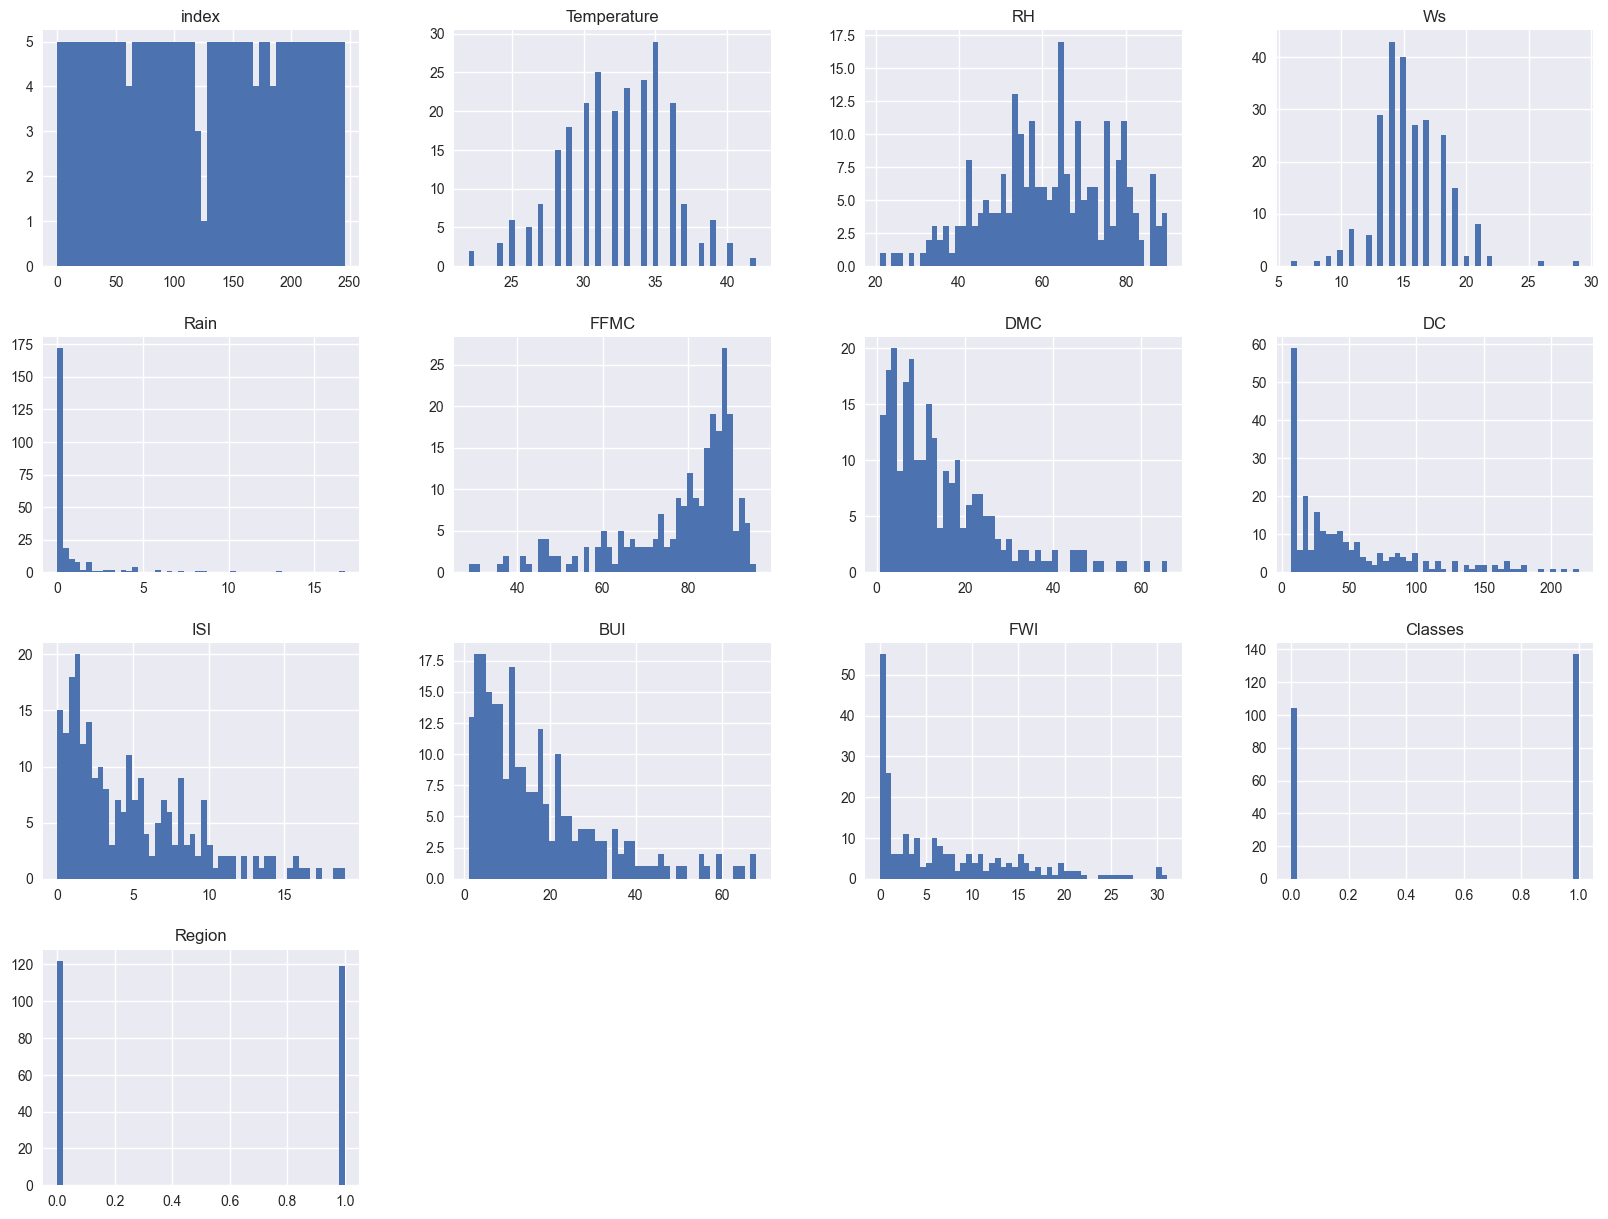

In [118]:
plt.style.use('seaborn-v0_8')
df.hist(bins=50,figsize=(20,15))
plt.show()

In [119]:
# percentage for pie chart

percentage = df['Classes'].value_counts(normalize=True)*100

Text(0.5, 1.0, 'Pie chart  of fire and not fire')

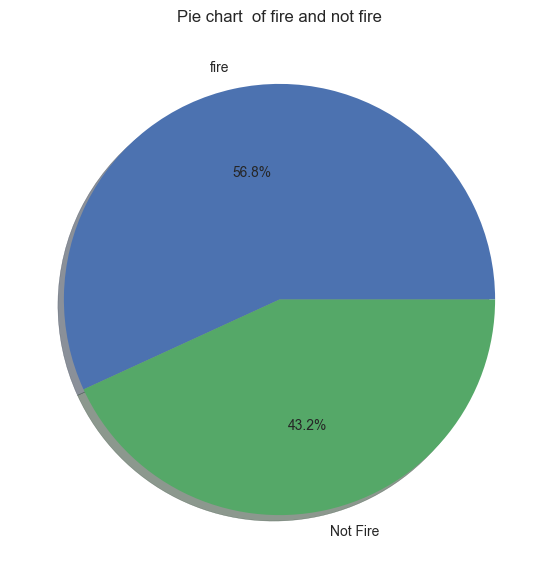

In [120]:
class_labels = ["fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=class_labels,autopct='%1.1f%%',shadow=True)
plt.title("Pie chart  of fire and not fire")

In [121]:
##corelation

In [122]:
df.corr()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
index,1.000000,0.218220,-0.379713,-0.171617,-0.032024,0.230501,0.259988,0.055943,0.282956,0.181645,0.254059,0.177997,0.874489
Temperature,0.218220,1.000000,-0.651184,-0.288538,-0.324519,0.679353,0.485406,0.375432,0.604182,0.459374,0.566649,0.516166,0.273554
RH,-0.379713,-0.651184,1.000000,0.251609,0.219067,-0.643718,-0.405444,-0.223201,-0.685228,-0.350446,-0.578951,-0.428928,-0.410789
Ws,-0.171617,-0.288538,0.251609,1.000000,0.179167,-0.182322,-0.009466,0.072004,-0.000320,0.023004,0.024420,-0.080857,-0.173839
Rain,-0.032024,-0.324519,0.219067,0.179167,1.000000,-0.541693,-0.285066,-0.294782,-0.344192,-0.296227,-0.321227,-0.375657,-0.047080
FFMC,0.230501,0.679353,-0.643718,-0.182322,-0.541693,1.000000,0.599438,0.502847,0.737525,0.587699,0.688538,0.766622,0.237933
DMC,0.259988,0.485406,-0.405444,-0.009466,-0.285066,0.599438,1.000000,0.875084,0.677847,0.982107,0.874943,0.581867,0.201872
DC,0.055943,0.375432,-0.223201,0.072004,-0.294782,0.502847,0.875084,1.000000,0.505104,0.941620,0.737783,0.507224,-0.072004
ISI,0.282956,0.604182,-0.685228,-0.000320,-0.344192,0.737525,0.677847,0.505104,1.000000,0.641194,0.922326,0.732736,0.273803
BUI,0.181645,0.459374,-0.350446,0.023004,-0.296227,0.587699,0.982107,0.941620,0.641194,1.000000,0.856918,0.582868,0.098330


<Axes: >

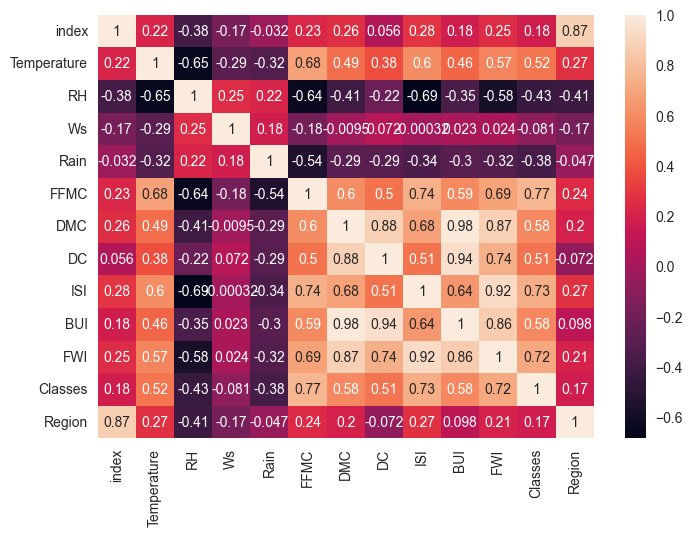

In [123]:
sns.heatmap(df.corr(),annot=True)

<Axes: ylabel='FWI'>

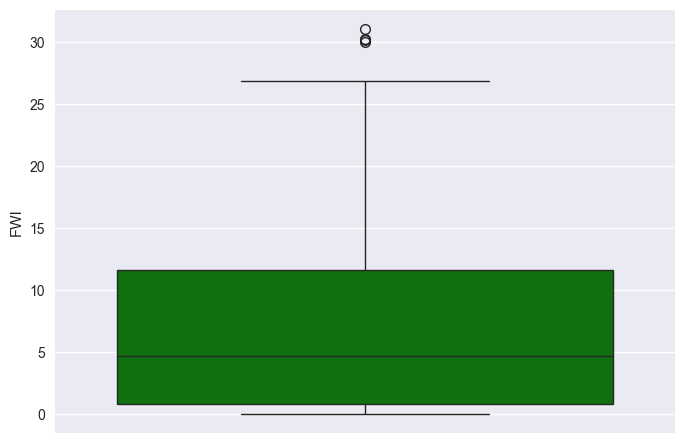

In [124]:
## boxplot
sns.boxplot(df["FWI"],color='g')

In [125]:
df_1['Classes']=np.where(df_1['Classes'].str.contains('not fire'),'not fire','fire') 

Text(0.5, 1.0, 'monthly fire analysis')

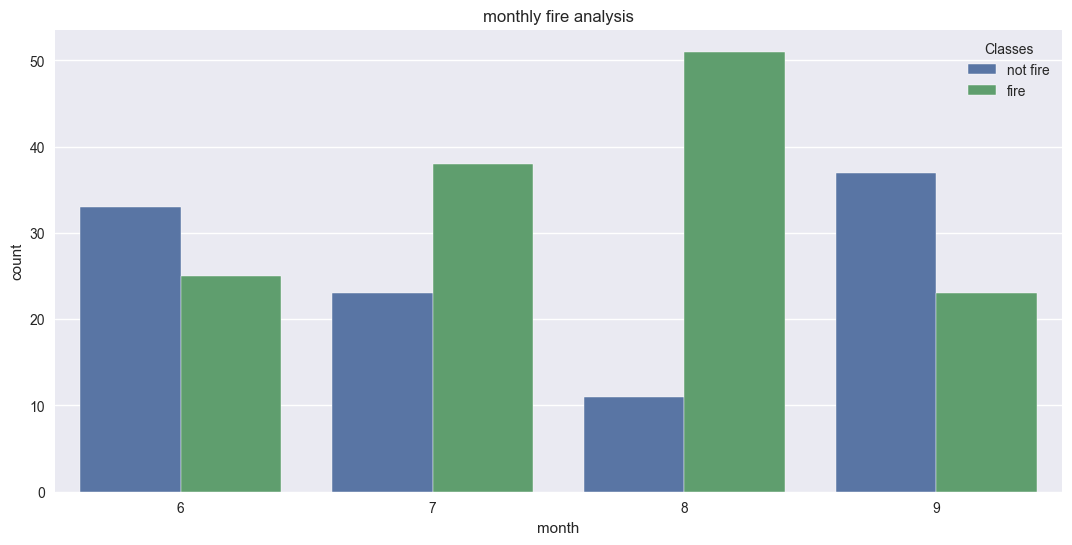

In [126]:
## monthly fire analysis
dftemp = df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style("darkgrid")
sns.countplot(x='month',hue='Classes',data=df_1)
plt.xlabel("month")
plt.ylabel("count")
plt.title("monthly fire analysis")


In [127]:
## model  